In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

#load dataset
df = pd.read_csv('C:/Users/HP/Desktop/Python_Data_Project/datasets/data_jobs.csv')

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [64]:
# data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# drop NaN values
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

In [65]:
df_DA_US['salary_year_avg'].sample(10)

153838    150000.0
156708    115000.0
399164    157500.0
218954     91000.0
404131    119268.0
120709     60000.0
470338     77446.0
537273    140000.0
21374      92500.0
174997     47500.0
Name: salary_year_avg, dtype: float64

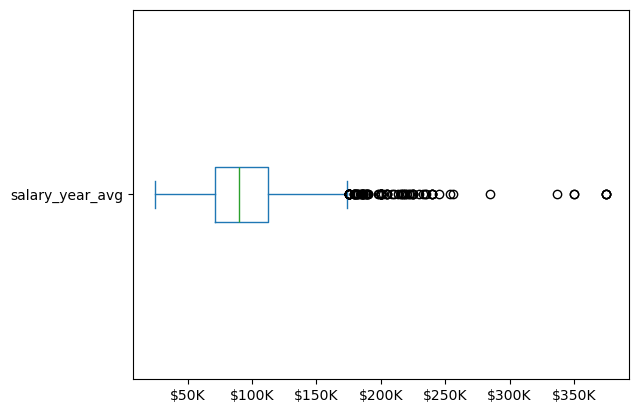

In [66]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
plt.ylabel('')

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

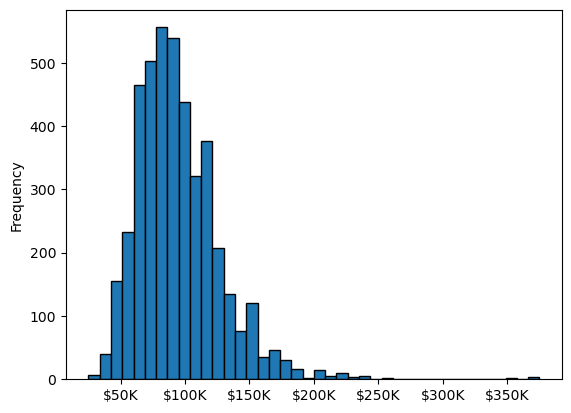

In [67]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

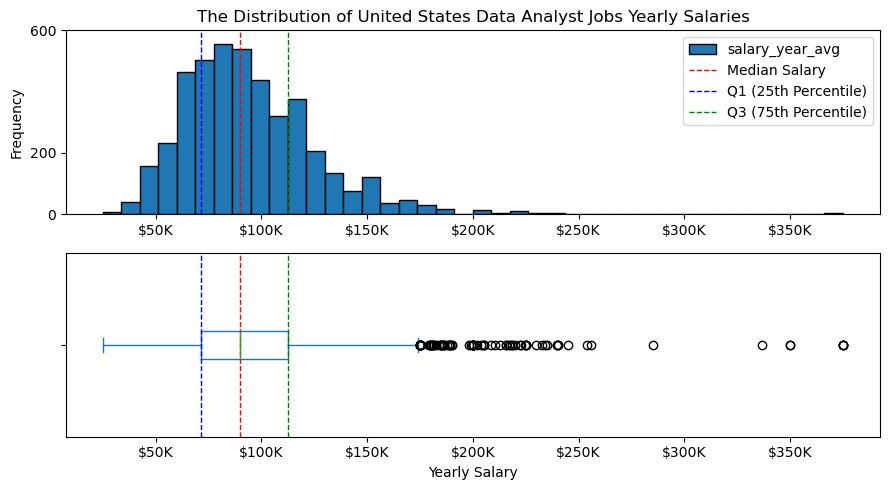

In [68]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(2, 1, figsize=(9, 5))

#quartiles
Q1 = df_DA_US['salary_year_avg'].quantile(0.25)
Q3 = df_DA_US['salary_year_avg'].quantile(0.75)

# Histogram
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black', ax=ax[0])
ax[0].set_ylabel('Frequency')
ax[0].set_yticks([0, 200, 600])  # Set custom y-axis ticks
ax[0].set_title("The Distribution of United States Data Analyst Jobs Yearly Salaries")

# Box plot
df_DA_US['salary_year_avg'].plot(kind='box', vert=False, ax=ax[1])
ax[1].set_xlabel('Yearly Salary')
ax[1].set_yticklabels('')
# Shared x-axis formatting
formatter = ticker.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
ax[1].xaxis.set_major_formatter(formatter)

# Also apply to the top plot for visual consistency
ax[0].xaxis.set_major_formatter(formatter)

# Add broken (dashed) lines to mark median and/or compare distribution features
median_salary = df_DA_US['salary_year_avg'].median()
for a in ax:
    a.axvline(median_salary, color='red', linestyle='--', linewidth=1, label='Median Salary')
    a.axvline(Q1, color='blue', linestyle='--', linewidth=1, label='Q1 (25th Percentile)')
    a.axvline(Q3, color='green', linestyle='--', linewidth=1, label='Q3 (75th Percentile)')

# Add legend only to the first plot
ax[0].legend()

plt.tight_layout()
plt.show()


In [69]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
# list of job_titles with salary_year_avg
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

In [70]:
# drop NaN values
df_US = df_US.dropna(subset='salary_year_avg')

In [71]:
df_US['salary_year_avg'].sample(10)

255774    125000.0
380552    180000.0
214675     82500.0
89291      63991.0
629917    115000.0
303467     52500.0
231569     79930.0
100532    163000.0
3237      120000.0
286899    112500.0
Name: salary_year_avg, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_13132\2418512213.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


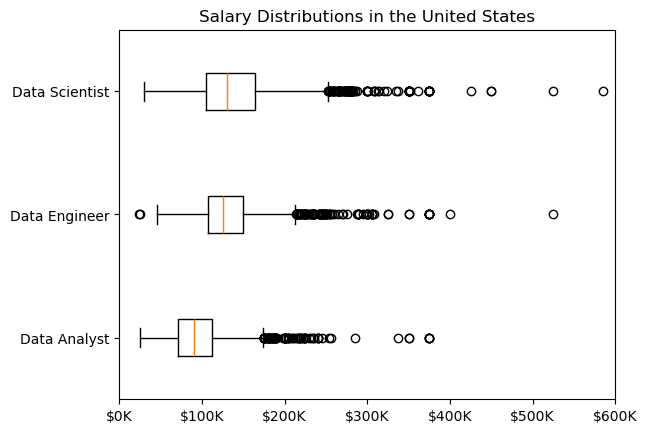

In [76]:
plt.boxplot(job_list, labels=job_titles, vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.title('Salary Distributions in the United States')
plt.show()